<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/Deep_AI/Course-2/Course_2_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cats vs Dogs

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

print('Using TensorFlow version - ', tf.__version__)
import numpy as np
import os
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Using TensorFlow version -  2.2.0


##Downloading Data

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

/tmp/cats_and_dogs_filtered.zip: No such file or directory


In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'

zipref = zipfile.ZipFile(local_zip, 'r')
zipref.extractall('/tmp')
zipref.close()

FileNotFoundError: ignored

In [ ]:
path = '/tmp/cats_and_dogs_filtered'
os.listdir(path)

['validation', 'vectorize.py', 'train']

In [ ]:
train_dir = os.path.join(path, 'train')
validate_dir = os.path.join(path, 'validation')
os.listdir(train_dir)

['dogs', 'cats']

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validate_dir, 'cats')
validation_dogs_dir = os.path.join(validate_dir, 'dogs')

In [ ]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.845.jpg', 'cat.928.jpg', 'cat.908.jpg', 'cat.496.jpg', 'cat.386.jpg', 'cat.414.jpg', 'cat.410.jpg', 'cat.773.jpg', 'cat.640.jpg', 'cat.28.jpg']
['dog.206.jpg', 'dog.329.jpg', 'dog.312.jpg', 'dog.435.jpg', 'dog.310.jpg', 'dog.901.jpg', 'dog.491.jpg', 'dog.141.jpg', 'dog.353.jpg', 'dog.210.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


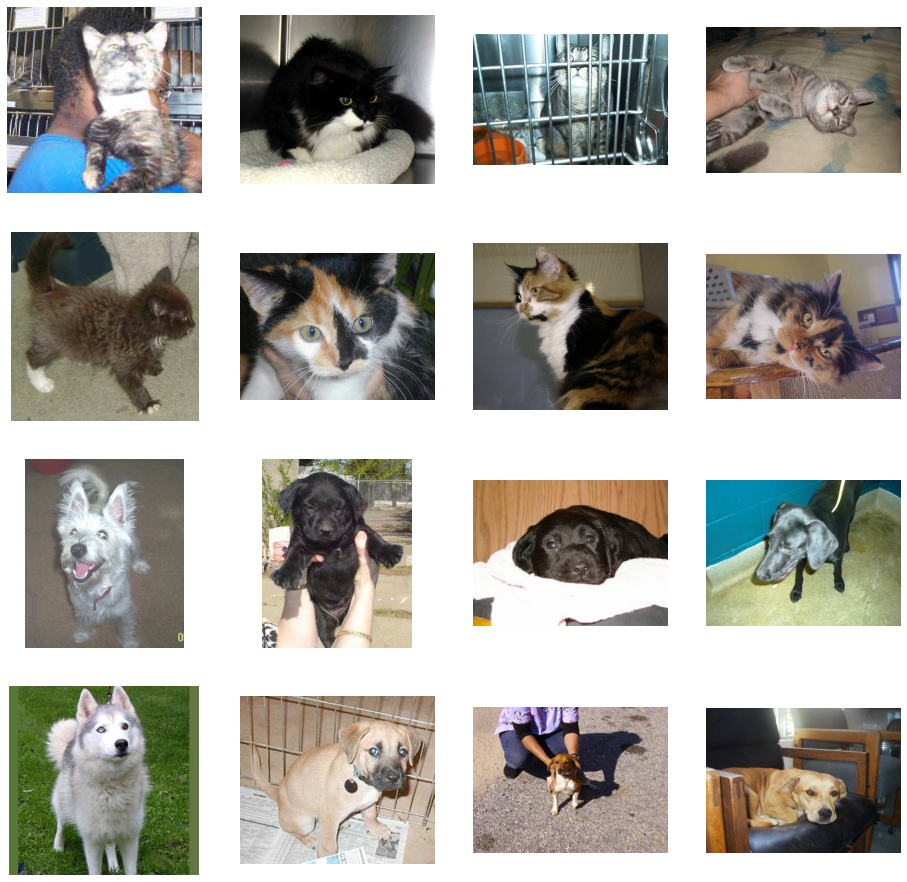

In [ ]:


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
model = models.Sequential([
                           Conv2D(filters = 16, 
                                  kernel_size = (3,3), 
                                  activation = 'relu', 
                                  input_shape = (150, 150, 3)),
                           MaxPooling2D(2, 2),
                           Conv2D(filters = 32,
                                  kernel_size = (3, 3),
                                  activation = 'relu'),
                           MaxPooling2D(2, 2),
                           Conv2D(filters=64,
                                  kernel_size = (3,3),
                                  activation = 'relu'),
                           Flatten(),
                           Dense(units = 512, activation='relu'),
                           Dense(units = 1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               3

In [ ]:
model.compile(optimizer=RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True
)


In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validate_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 100,
                    epochs = 15,
                    validation_steps = 50,
                    verbose = 2
)

Epoch 1/15
100/100 - 20s - loss: 1.0992 - accuracy: 0.5270 - val_loss: 0.6868 - val_accuracy: 0.5700
Epoch 2/15
100/100 - 20s - loss: 0.6941 - accuracy: 0.5650 - val_loss: 0.7135 - val_accuracy: 0.5120
Epoch 3/15
100/100 - 20s - loss: 0.6769 - accuracy: 0.6125 - val_loss: 0.6509 - val_accuracy: 0.6060
Epoch 4/15
100/100 - 20s - loss: 0.6591 - accuracy: 0.6425 - val_loss: 0.6178 - val_accuracy: 0.6620
Epoch 5/15
100/100 - 20s - loss: 0.6198 - accuracy: 0.6615 - val_loss: 0.6107 - val_accuracy: 0.6800
Epoch 6/15
100/100 - 20s - loss: 0.6101 - accuracy: 0.6870 - val_loss: 0.5864 - val_accuracy: 0.6730
Epoch 7/15
100/100 - 20s - loss: 0.5917 - accuracy: 0.6905 - val_loss: 0.5940 - val_accuracy: 0.6770
Epoch 8/15
100/100 - 20s - loss: 0.5898 - accuracy: 0.7055 - val_loss: 0.6106 - val_accuracy: 0.6650
Epoch 9/15
100/100 - 20s - loss: 0.5790 - accuracy: 0.7060 - val_loss: 0.5742 - val_accuracy: 0.7230
Epoch 10/15
100/100 - 20s - loss: 0.5598 - accuracy: 0.7190 - val_loss: 0.5747 - val_accura

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Using TensorFlow backend.


Saving cat.jpg to cat.jpg
[8.481057e-25]
cat.jpg is a dog


### Visualizing Intermediate Representations


In [ ]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visulaization_model = models.Model(inputs = model.input, outputs = successive_outputs)
cat_img_files = [os.path.join(train_cats_dir, file) for file in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, file) for file in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size = (150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255.0
successive_feature_maps = visulaization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


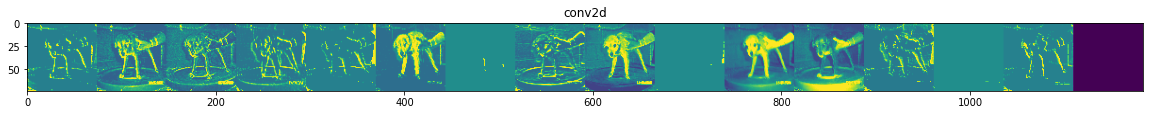

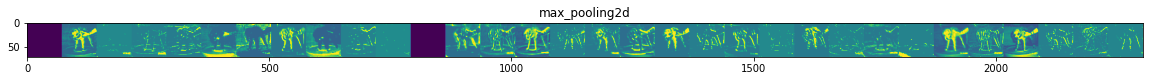

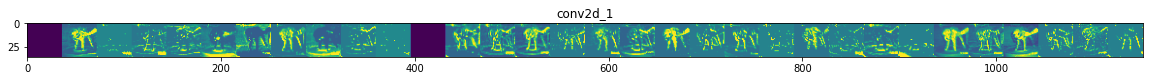

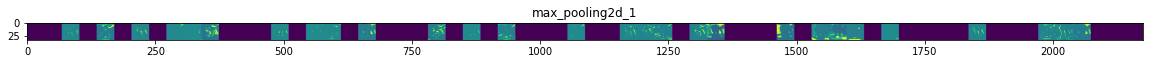

In [ ]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

### Evaluating Accuracy and Loss for the Model


Text(0.5, 1.0, 'Training and validation loss')

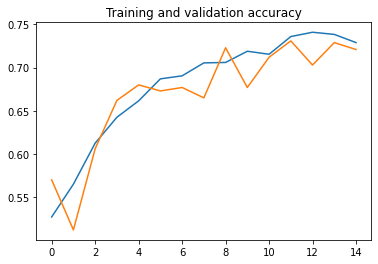

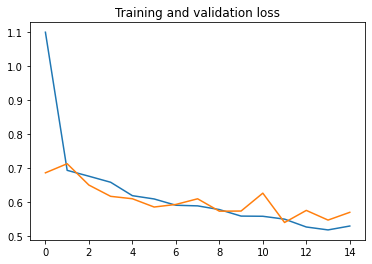

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )


In [ ]:
data_path = '/tmp/cats-v-dogs'
os.mkdir(data_path)

train_dir = os.path.join(data_path, 'train')
os.mkdir(train_dir)
train_cats_dir = os.path.join(train_dir, 'Cat')
train_dogs_dir = os.path.join(train_dir, 'Dog')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

test_dir = os.path.join(data_path, 'test')
os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'Cat')
test_dogs_dir = os.path.join(test_dir, 'Dog')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

#Assignment


In [ ]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


/tmp/cats-and-dogs.zip: No such file or directory


FileNotFoundError: ignored

In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    data_path = '/tmp/cats-v-dogs'
    os.mkdir(data_path)
    
    train_dir = os.path.join(data_path, 'training')
    os.mkdir(train_dir)
    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    
    test_dir = os.path.join(data_path, 'testing')
    os.mkdir(test_dir)
    test_cats_dir = os.path.join(test_dir, 'cats')
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)
    #YOUR CODE GOES HERE
except OSError:
    pass



FileNotFoundError: ignored

In [ ]:

# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    source_files = os.listdir(SOURCE)
    random.shuffle(source_files)
    len_train = int(round(SPLIT_SIZE*len(source_files)))

    train_files = source_files[:len_train]
    test_files = source_files[len_train:]
    
    for file in train_files:
        source_file_path = os.path.join(SOURCE, file)
        train_file_path = os.path.join(TRAINING, file)
        file_size = os.path.getsize(source_file_path)
        copyfile(source_file_path, train_file_path)
        if os.path.getsize(source_file_path)==os.path.getsize(train_file_path):
            pass
        else:
            copyfile(source_file_path, train_file_path)
    for file in test_files:
        source_file_path = os.path.join(SOURCE, file)
        test_file_path = os.path.join(TESTING, file)
        file_size = os.path.getsize(source_file_path)
        copyfile(source_file_path, test_file_path)
        if os.path.getsize(source_file_path)==os.path.getsize(test_file_path):
            pass
        else:
            copyfile(source_file_path, test_file_path)            
        
    
# YOUR CODE STARTS HERE
# YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)